In [3]:
#导入pyplot,起别名plt
import matplotlib.pyplot as plt
#让图表在jupyter中展示
%matplotlib inline
#解决中文乱码问题
plt.rcParams["font.sans-serif"] = 'SimHei'
#解决负号无法正常显示问题
plt.rcParams['axes.unicode_minus'] = False
#图表设置成矢量图格式显示，使图表显示清晰
%config InlineBackend.figure_format = 'svg'

In [4]:
import pandas as pd
#import numpy as np
#导入数据文件
df = pd.read_csv(r'E:\数据分析learn\项目学生消费行为分析\项目数据\result\task1_X.csv',encoding = "gbk")
#print(df.head())
#提取各食堂数据
index = ['第一食堂','第二食堂','第三食堂','第四食堂','第五食堂']
data1 = df.loc[df['Dept'].isin(index)]
#data1.head()
data1['Date']=pd.to_datetime(data1['Date'])#转换时间类型
data1['hour'] = data1['Date'].dt.hour  # 提取时
data1['day']=[i.day for i in data1['Date']]   # 提取天
#划分时间段
data2 = data1.loc[(data1['hour'] >=6) & (data1['hour'] <=10)]#早上
data3 = data1.loc[(data1['hour'] >=11) & (data1['hour'] <=14)]#中午
data4 = data1.loc[(data1['hour'] >=17) & (data1['hour'] <=19)]#晚上

a1 = data2.groupby(['day','Dept'])['CardNo'].nunique() #一天的早餐人数
b1 = a1.groupby('Dept').sum() #一个月早餐人数统计

a2 = data3.groupby(['day','Dept'])['CardNo'].nunique() #一天午餐
b2 = a2.groupby('Dept').sum() #月午餐

a3 = data4.groupby(['day','Dept'])['CardNo'].nunique()#一天晚
b3 = a3.groupby('Dept').sum()#月晚餐


#食堂排序
print(b1.sort_values())#排序
print(b2.sort_values())
print(b3.sort_values())
#c1.rank()#食堂排名

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Dept
第四食堂      676
第三食堂     1057
第一食堂    12040
第五食堂    20750
第二食堂    32741
Name: CardNo, dtype: int64
Dept
第一食堂    10945
第三食堂    18478
第二食堂    19764
第五食堂    22092
第四食堂    26977
Name: CardNo, dtype: int64
Dept
第一食堂     7589
第三食堂    13003
第二食堂    14940
第五食堂    15027
第四食堂    20524
Name: CardNo, dtype: int64


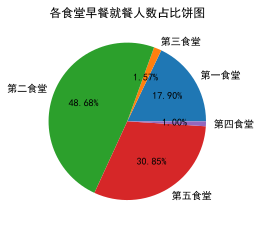

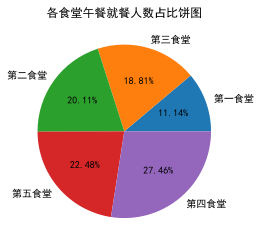

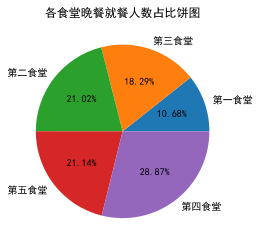

In [5]:
# 绘制早中晚各食堂就餐人数占比饼图
fig = plt.figure(figsize=(12,12))
#早
ax1 = fig.add_subplot(1,3,1)
plt.pie(b1,labels=b1.index,autopct='%.2f%%')
plt.title('各食堂早餐就餐人数占比饼图')
plt.savefig(r"E:\数据分析learn\项目学生消费行为分析\项目数据\result\task2_X1.jpg")
plt.show()
#中
ax2 = fig.add_subplot(1,3,2)
x = b2.index
plt.pie(b2,labels=x,autopct='%.2f%%')
plt.title('各食堂午餐就餐人数占比饼图')
plt.savefig(r"E:\数据分析learn\项目学生消费行为分析\项目数据\result\task2_X2.jpg")
plt.show()
#晚
ax3 = fig.add_subplot(1,3,3)
x = b3.index
plt.pie(b3,labels=x,autopct='%.2f%%')
plt.title('各食堂晚餐就餐人数占比饼图')
plt.savefig(r"E:\数据分析learn\项目学生消费行为分析\项目数据\result\task2_X3.jpg")
plt.show()

In [6]:
data1['weekday'] = data1['Date'].apply(lambda x: x.weekday()+1) # 提取星期
fwork = data1.loc[(data1['weekday'].apply(lambda x: x in [6, 7])) | (data1['day'].apply(lambda x: x == 5))]#提取非工作日的数据
#提取工作日
index = ['1','2','3','4','5']
wk = data1.loc[data1['weekday'].isin(index) | (data1['day'].apply(lambda x: x == 28))]
work = wk.loc[(wk['day'].apply(lambda x: x != 5)),:]

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


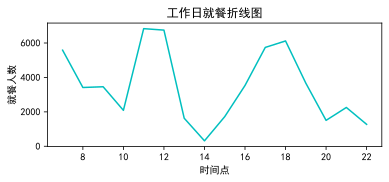

In [7]:
#就餐折线图
fig=plt.figure(figsize=(6,5))
#工作日
ax1 = fig.add_subplot(2,1,1)
#data=data.head(5)
y = work.groupby("hour")['CardNo'].nunique()
x = y.index
plt.title('工作日就餐折线图')
plt.xlabel('时间点')   # 设置x轴标签
plt.ylabel('就餐人数')  # 设置y轴标签
#添加数据标签
#for a,b in zip(x,y):
#    plt.text(a,b,b,ha = 'center',va = 'bottom',fontsize=11)
#设置网格线
#plt.grid(True)
plt.plot(x,y,c='c')
plt.savefig(r"E:\数据分析learn\项目学生消费行为分析\项目数据\result\task2_X4.jpg")
plt.show()

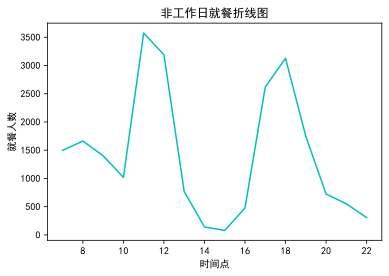

In [8]:
#非工作日
ax2 = fig.add_subplot(2,1,2)
#data=data.head(5)
y = fwork.groupby("hour")['CardNo'].nunique()
x = y.index
plt.title('非工作日就餐折线图')
plt.xlabel('时间点')   # 设置x轴标签
plt.ylabel('就餐人数')  # 设置y轴标签
plt.plot(x,y,c='c')
plt.savefig(r"E:\数据分析learn\项目学生消费行为分析\项目数据\result\task2_X5.jpg")
plt.show()